In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Convert the regression target into a binary classification problem
y = (y > np.median(y)).astype(int)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_clf.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.72
Confusion Matrix:
[[37 12]
 [13 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        49
           1       0.69      0.68      0.68        40

    accuracy                           0.72        89
   macro avg       0.72      0.72      0.72        89
weighted avg       0.72      0.72      0.72        89



In [ ]:
# Feature Importance
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {diabetes.feature_names[indices[f]]} ({importances[indices[f]]:.4f})")

Feature ranking:
1. feature bmi (0.2081)
2. feature s5 (0.1604)
3. feature bp (0.1187)
4. feature s2 (0.0929)
5. feature s3 (0.0913)
6. feature s6 (0.0843)
7. feature s1 (0.0797)
8. feature age (0.0783)
9. feature s4 (0.0661)
10. feature sex (0.0202)


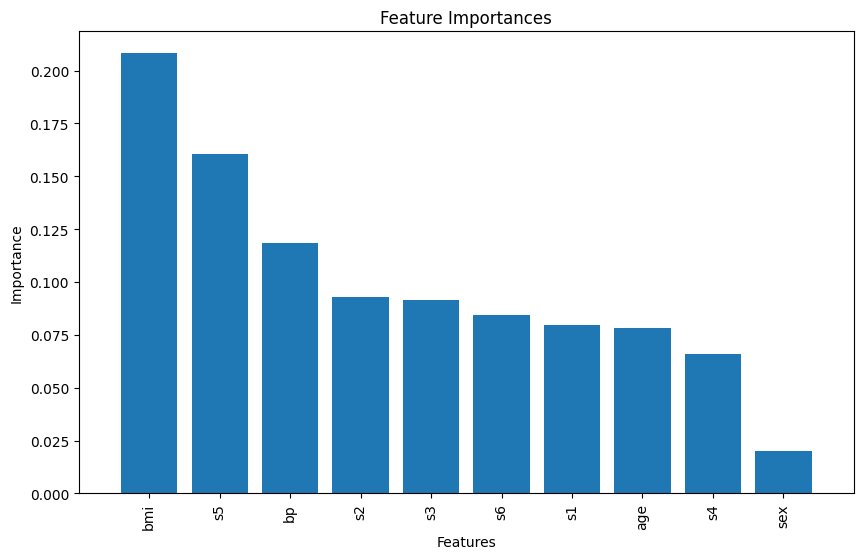

In [ ]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(diabetes.feature_names)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()